# Foreign Trade - Overall development in foreign trade since 1950

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Overall development in foreign trade in million Euro.xlsx')
df = pd.read_excel(filepath)

# Head and Tail

In [4]:
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct
0,1950,4 275,5 815,NaN,NaN
1,1951,7 453,7 529,74.3,29.5
2,1952,8 645,8 284,16.0,10.0
3,1953,9 472,8 186,9.6,1.2
4,1954,11 266,9 887,18.9,20.8
...,...,...,...,...,...
66,2016,1 203 833,954 917,0.9,0.6
67,2017,1 278 958,1 031 013,6.2,8.0
68,2018,1 317 440,1 088 720,3.0,5.6
69,2019,1 328 152,1 104 141,0.8,1.4


In [5]:
df.shape     

(71, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     int64  
 1   Exports      71 non-null     object 
 2   Imports      71 non-null     object 
 3   Exports_Pct  70 non-null     float64
 4   Imports_Pct  70 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


# Data Cleaning

In [7]:
df['Exports'] = df['Exports'].str.replace(' ', '')                        # remove white spaces between exports
df['Imports'] = df['Imports'].str.replace(' ', '')                        # remove white spaces between imports
df['Exports'] = df['Exports'].astype('int')                               # change exports datatype to integer
df['Imports'] = df['Imports'].astype('int')                               # change imports datatype to integer

df

,Year,Exports,Imports,Exports_Pct,Imports_Pct
0,1950,4275,5815,NaN,NaN
1,1951,7453,7529,74.3,29.5
2,1952,8645,8284,16.0,10.0
3,1953,9472,8186,9.6,1.2
4,1954,11266,9887,18.9,20.8
...,...,...,...,...,...
66,2016,1203833,954917,0.9,0.6
67,2017,1278958,1031013,6.2,8.0
68,2018,1317440,1088720,3.0,5.6
69,2019,1328152,1104141,0.8,1.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     int64  
 1   Exports      71 non-null     int32  
 2   Imports      71 non-null     int32  
 3   Exports_Pct  70 non-null     float64
 4   Imports_Pct  70 non-null     float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 2.3 KB


In [9]:
df['Exp_Imp_Chg'] = np.subtract(df['Exports'], df['Imports'])
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540
1,1951,7453,7529,74.3,29.5,-76
2,1952,8645,8284,16.0,10.0,361
3,1953,9472,8186,9.6,1.2,1286
4,1954,11266,9887,18.9,20.8,1379
...,...,...,...,...,...,...
66,2016,1203833,954917,0.9,0.6,248916
67,2017,1278958,1031013,6.2,8.0,247945
68,2018,1317440,1088720,3.0,5.6,228720
69,2019,1328152,1104141,0.8,1.4,224011


In [10]:
df.describe()

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
count,71.000000,7.100000e+01,7.100000e+01,70.000000,70.000000,71.000000
mean,1985.000000,4.030955e+05,3.364823e+05,10.077143,9.781429,66613.169014
std,20.639767,4.161218e+05,3.398854e+05,9.771923,7.080803,78399.931232
min,1950.000000,4.275000e+03,5.815000e+03,0.200000,0.300000,-1540.000000
25%,1967.500000,4.770250e+04,3.933100e+04,4.175000,3.825000,6272.000000
50%,1985.000000,2.691250e+05,2.115440e+05,8.850000,8.050000,26218.000000
75%,2002.500000,6.578875e+05,5.405425e+05,12.900000,14.050000,131354.500000
max,2020.000000,1.328152e+06,1.104141e+06,74.300000,29.500000,248916.000000


# Missing Values Exploration

In [11]:
df.isna().sum()

Year           0
Exports        0
Imports        0
Exports_Pct    1
Imports_Pct    1
Exp_Imp_Chg    0
dtype: int64

In [12]:
idx = df.index[df['Exports_Pct'].isna()]                 # filter index position with missing value for exports percentage change
df.iloc[idx]

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540


In [13]:
idx1 = df.index[df['Imports_Pct'].isna()]                # filter index position with missing value for imports percentage change
df.iloc[idx1]

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540


In [14]:
df[['Exports', 'Imports']] = df[['Exports', 'Imports']] * 1e3               # convert exports and imports into millions
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4.275000e+06,5.815000e+06,NaN,NaN,-1540
1,1951,7.453000e+06,7.529000e+06,74.3,29.5,-76
2,1952,8.645000e+06,8.284000e+06,16.0,10.0,361
3,1953,9.472000e+06,8.186000e+06,9.6,1.2,1286
4,1954,1.126600e+07,9.887000e+06,18.9,20.8,1379
...,...,...,...,...,...,...
66,2016,1.203833e+09,9.549170e+08,0.9,0.6,248916
67,2017,1.278958e+09,1.031013e+09,6.2,8.0,247945
68,2018,1.317440e+09,1.088720e+09,3.0,5.6,228720
69,2019,1.328152e+09,1.104141e+09,0.8,1.4,224011


# Data Aggregation

Exports

In [15]:
df_agg_exp = df.agg(
    min_export = pd.NamedAgg('Exports', np.min),
    mean_export = pd.NamedAgg('Exports', np.mean),
    max_export = pd.NamedAgg('Exports', np.max),
    total_export = pd.NamedAgg('Exports', np.sum)  
)

df_agg_exp

,Exports
min_export,4.275000e+06
mean_export,4.030955e+08
max_export,1.328152e+09
total_export,2.861978e+10


Imports

In [16]:
df_agg_imp = df.agg(
    min_import = pd.NamedAgg('Imports', np.min),
    mean_import = pd.NamedAgg('Imports', np.mean),
    max_import = pd.NamedAgg('Imports', np.max),
    total_import = pd.NamedAgg('Imports', np.sum)  
)

df_agg_imp

,Imports
min_import,5.815000e+06
mean_import,3.364823e+08
max_import,1.104141e+09
total_import,2.389024e+10


In [17]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billions)


# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(millions)


# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def thousand(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# Data Visualization

Overall development in foreign trade 1950 - 2020 in Germany

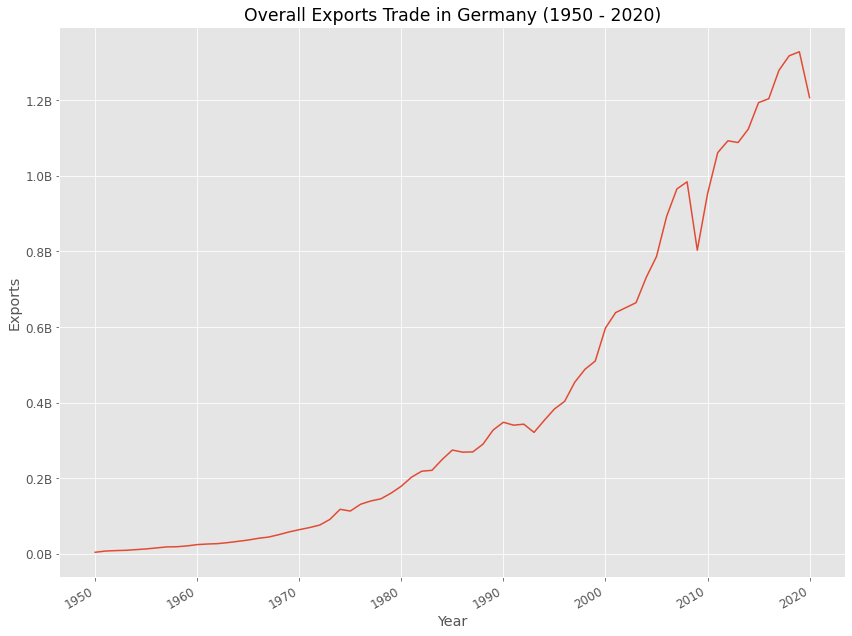

In [18]:
# initialize the matplotlib figure
fig, ax = plt.subplots()
fig.autofmt_xdate()

# plot exports trade
sns.lineplot(x='Year', y='Exports', data=df, ax=ax)
ax.set(title='Overall Exports Trade in Germany (1950 - 2020)', xlabel='Year', ylabel='Exports')

# set y-axis formatter
ax.yaxis.set_major_formatter(format_bill)

Overall Imports Trade in Germany (1950 - 2020)

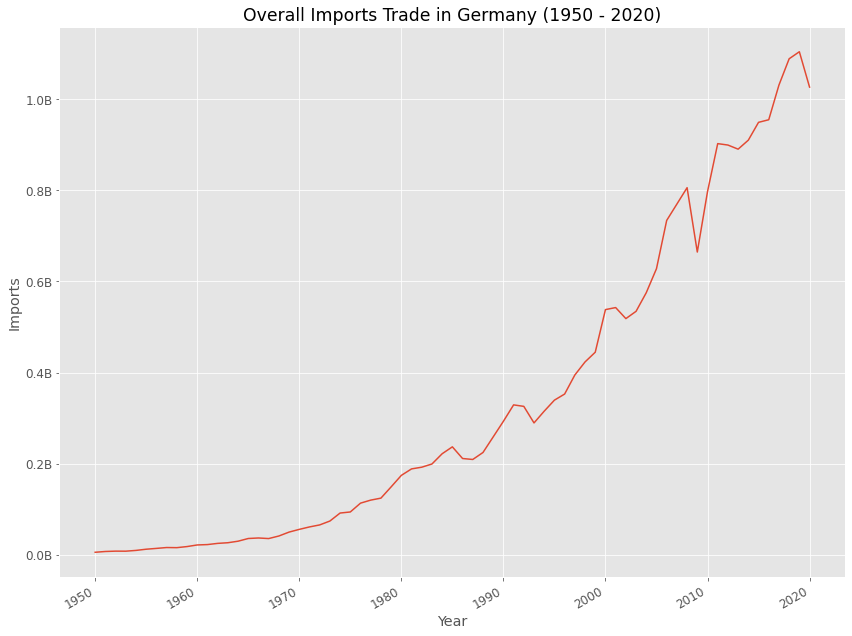

In [19]:
# initialize the matplotlib figure
fig1, ax1 = plt.subplots()
fig1.autofmt_xdate()

# plot imports trade
sns.lineplot(x='Year', y='Imports', data=df, ax=ax1)
ax1.set(title='Overall Imports Trade in Germany (1950 - 2020)', xlabel='Year', ylabel='Imports')

# set y-axis formatter
ax1.yaxis.set_major_formatter(format_bill)

Export or Import Surplus

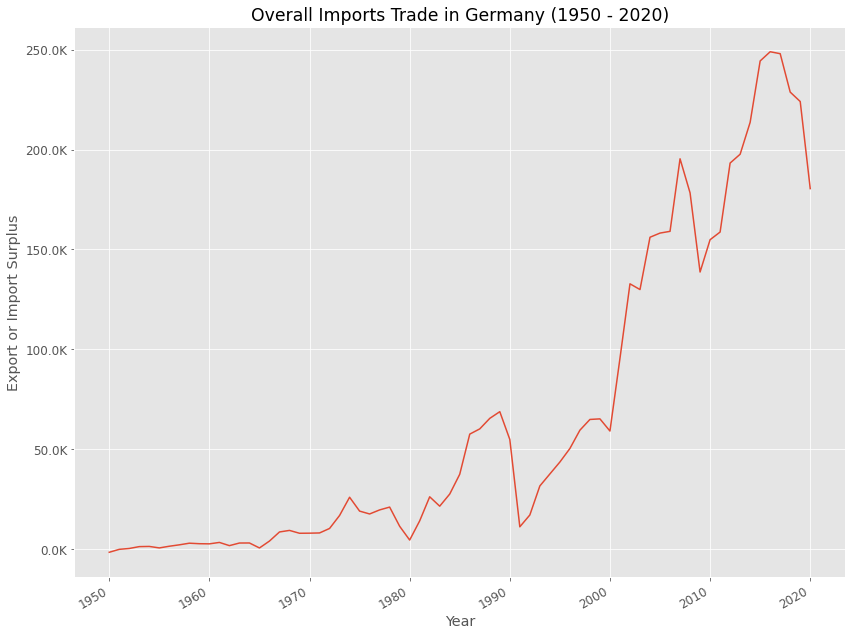

In [20]:
# initialize the matplotlib figure
fig2, ax2 = plt.subplots()
fig2.autofmt_xdate()

# plot imports trade
sns.lineplot(x='Year', y='Exp_Imp_Chg', data=df, ax=ax2)
ax2.set(title='Overall Imports Trade in Germany (1950 - 2020)', xlabel='Year', ylabel='Export or Import Surplus')

# set y-axis formatter
ax2.yaxis.set_major_formatter(format_tsd)

Exports and Imports

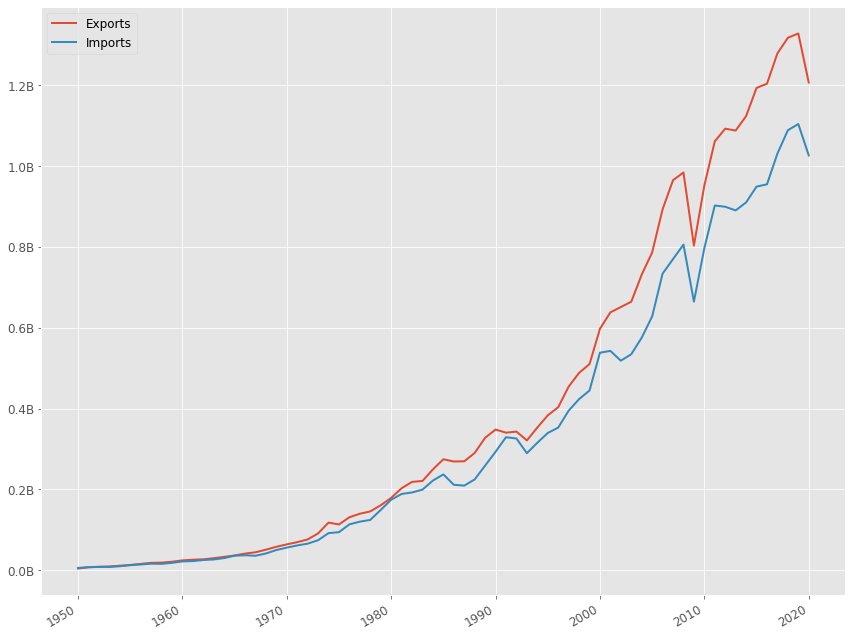

In [21]:
# initialize the matplotlib figure
fig3, ax3 = plt.subplots()
fig3.autofmt_xdate()

# percentage exports, imports and change in exports and imports
ax3.plot(df['Year'], df['Exports'], label='Exports', linewidth=2)
ax3.plot(df['Year'], df['Imports'], label='Imports', linewidth=2)

# set y-axis limit
ax3.yaxis.set_major_formatter(format_bill)

# label plots
ax3.legend(loc='upper left')

Exports and Imports in Percent

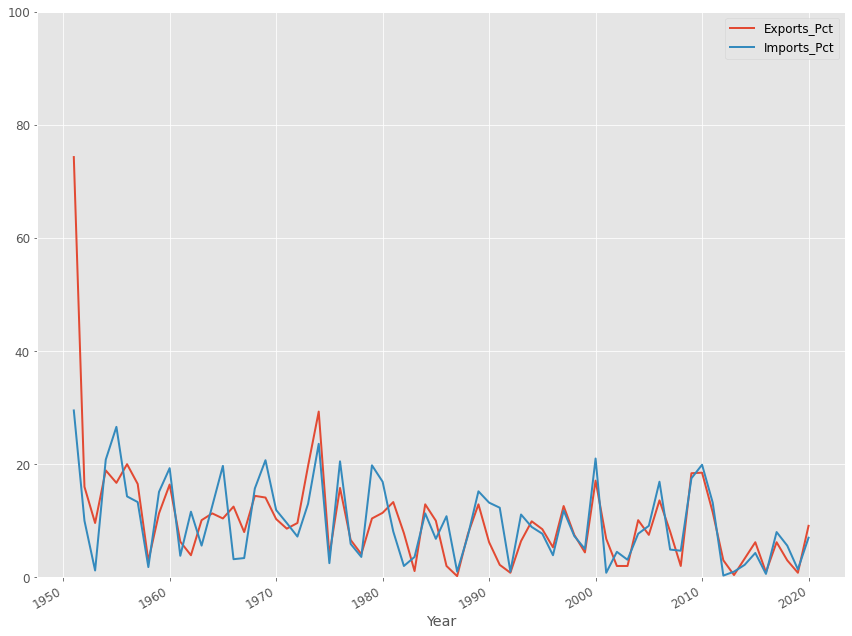

In [22]:
# initialize the matplotlib figure
fig4, ax4 = plt.subplots()
fig4.autofmt_xdate()

# percentage change in exports and imports
ax4.plot(df['Year'], df['Exports_Pct'], label='Exports_Pct', linewidth=2)
ax4.plot(df['Year'], df['Imports_Pct'], label='Imports_Pct', linewidth=2)

# set plot labels
ax4.set_xlabel('Year')

# set y-axis limit
ax4.set_ylim(0, 100)

# legend label
ax4.legend(loc='upper right')